<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_11102_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# the first code in Colab (Python)
print('Hello, Times series analysis.')


Hello, Times series analysis.


In [ ]:
import numpy as np 
import pandas as pd
import yfinance as yfinance
import statsmodels.api as sm

In [ ]:
#download data of ticker "^gspc" from yahoo finance
data = yf.download('^gspc')
#choose a column of "Adj Close" in the dataframe
data = data[['Adj Close']]
#choose a specific time period from 2000 to present 
data = data['2000':]

[*********************100%***********************]  1 of 1 completed


In [ ]:
# rename the column of variable
data.columns = ['price_spx']

In [ ]:
# create a new variable "ret_spx"
# pct_change() means the calculation for percentage return
data['ret_spx'] = data.price_spx.pct_change()

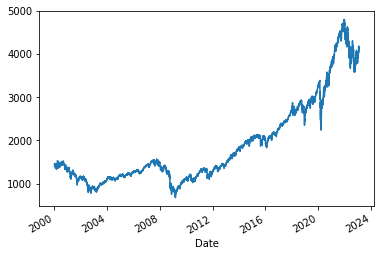

In [ ]:
# plot a time-series figure for the S&P 500 index
data.price_spx.plot()

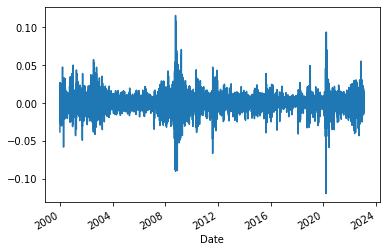

In [ ]:
# plot a figure about the daily return of S&P 500 index
data.ret_spx.plot()

In [ ]:
# construct a lagged-one term 
data['ret_spx_1'] = data.ret_spx.shift()

In [ ]:
# run a OLS regression model and estimation
y = data.ret_spx
x = sm.add_constant(data.ret_spx_1)
res = sm.OLS(y,x,missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_spx   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     66.13
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           5.13e-16
Time:                        06:57:59   Log-Likelihood:                 17259.
No. Observations:                5812   AIC:                        -3.451e+04
Df Residuals:                    5810   BIC:                        -3.450e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.777      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
